# Il faut utiliser le dataset CIFAR10 du framework TensoFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

2024-03-20 08:49:27.244825: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 08:49:27.305372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 08:49:27.305398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 08:49:27.307380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 08:49:27.317960: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 08:49:27.318432: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
cifar10_data = keras.datasets.cifar10
(all_x_train, all_y_train), (x_valid, y_valid) = cifar10_data.load_data()
all_x_train = all_x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0

In [3]:
print(f"all_x_train.shape = {all_x_train.shape}")
print(f"all_x_train[0].shape = {all_x_train[0].shape}")
print(f"all_x_train[0].dtype = {all_x_train[0].dtype}")

print(f"x_valid.shape = {x_valid.shape}")


all_x_train.shape = (50000, 32, 32, 3)
all_x_train[0].shape = (32, 32, 3)
all_x_train[0].dtype = float32
x_valid.shape = (10000, 32, 32, 3)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(all_x_train, all_y_train, test_size=0.2)

In [5]:
print(f"x_train.shape = {x_train.shape}")
print(f"x_train[0].shape = {x_train[0].shape}")
print(f"x_train[0].dtype = {x_train[0].dtype}")

x_train.shape = (40000, 32, 32, 3)
x_train[0].shape = (32, 32, 3)
x_train[0].dtype = float32


In [6]:
print(f"y_train.shape = {y_train.shape}")

y_train.shape = (40000, 1)


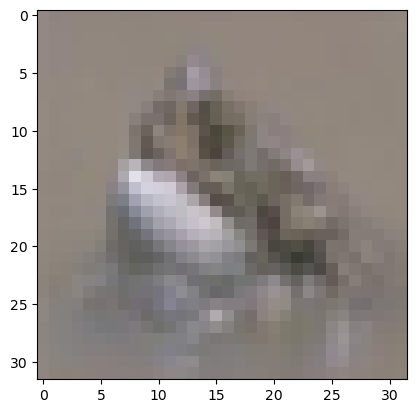

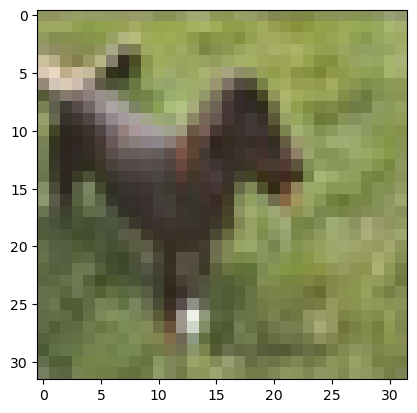

In [7]:
for i in range(2):
    my_img= x_train[i]
    plt.imshow(my_img)
    plt.show() 

In [8]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(150, activation="relu"))
model1.add(keras.layers.Dense(150, activation="relu"))
model1.add(keras.layers.Dense(150, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 10)                1510      
                                                                 
Total params: 1013860 (3.87 MB)
Trainable params: 101386

In [9]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
results = model1.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40


2024-03-20 08:49:32.748130: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 19s 15ms/step - loss: 1.8892 - accuracy: 0.3122 - val_loss: 1.7452 - val_accuracy: 0.3685
Epoch 2/40
1250/1250 [==============================] - 18s 14ms/step - loss: 1.7142 - accuracy: 0.3827 - val_loss: 1.6588 - val_accuracy: 0.3992
Epoch 3/40
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6483 - accuracy: 0.4088 - val_loss: 1.6551 - val_accuracy: 0.4049
Epoch 4/40
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5899 - accuracy: 0.4317 - val_loss: 1.5887 - val_accuracy: 0.4266
Epoch 5/40
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5548 - accuracy: 0.4444 - val_loss: 1.6113 - val_accuracy: 0.4164
Epoch 6/40
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5195 - accuracy: 0.4542 - val_loss: 1.5969 - val_accuracy: 0.4274
Epoch 7/40
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4928 - accuracy: 0.4656 - val_loss: 1.5179 - val_accura

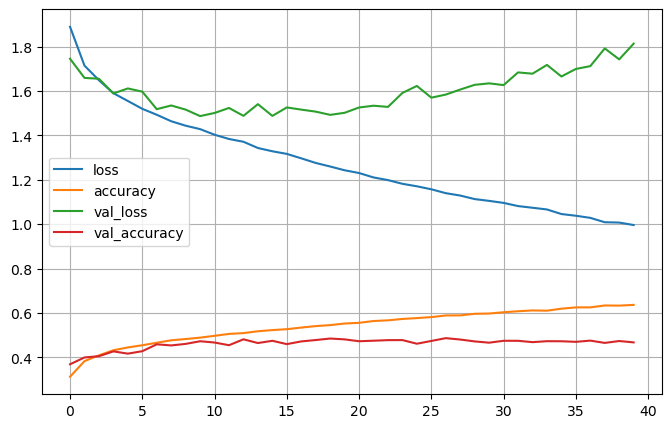

In [11]:
pd.DataFrame(results.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)  
plt.show()

In [13]:
print("Evaluation du modèle :")
model1.evaluate(x_valid, y_valid)

Evaluation du modèle :
313/313 [==============================] - 1s 4ms/step - loss: 1.7920 - accuracy: 0.4699


[1.7920068502426147, 0.4699000120162964]